# Naive RBF Test Cases

In [106]:
from naive_rbf import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random

## Classification

### Linear Simple

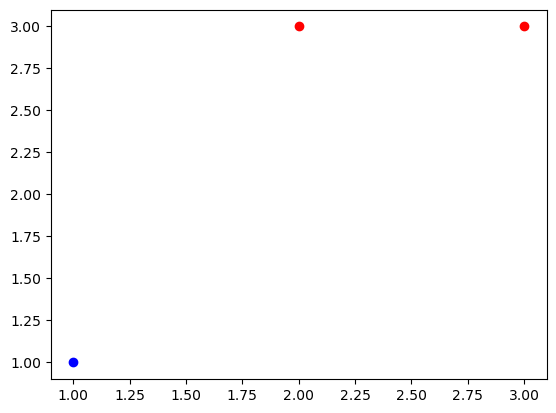

<Figure size 640x480 with 0 Axes>

In [107]:
training_dataset = np.array([
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0]
])
labels = np.array([
    [1.0],
    [-1.0],
    [-1.0]
])

plt.scatter(training_dataset[0, 0], training_dataset[0, 1], color='blue')
plt.scatter(training_dataset[1:3, 0], training_dataset[1:3, 1], color='red')
plt.show()
plt.clf()

In [108]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [109]:
gamma: float = 0.1
model.fit(gamma)

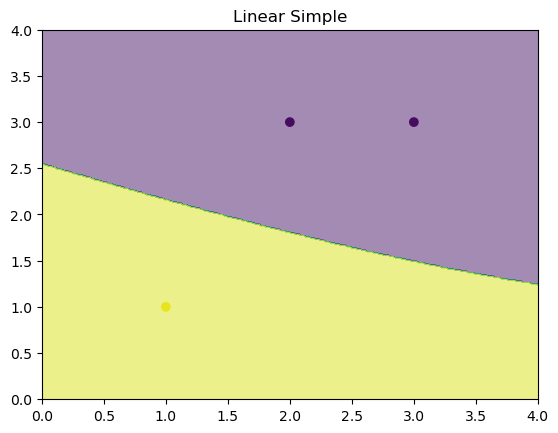

<Figure size 640x480 with 0 Axes>

In [110]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(0, 4, 300)
y = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Linear Simple')
plt.show()
plt.clf()

### Linear Multiple

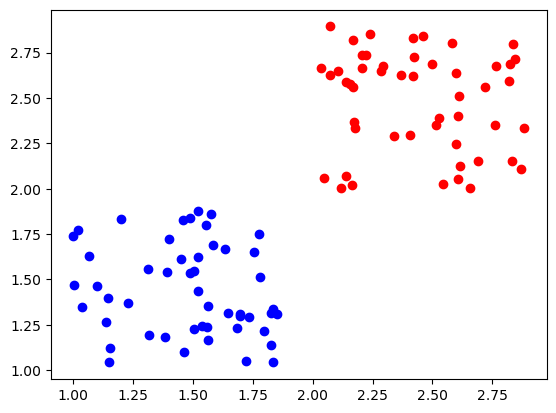

<Figure size 640x480 with 0 Axes>

In [111]:
training_dataset = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
labels = np.concatenate(
    [np.ones((50, 1)), np.ones((50, 1)) * -1.0]
)

plt.scatter(training_dataset[0:50, 0], training_dataset[0:50, 1], color='blue')
plt.scatter(training_dataset[50:100, 0], training_dataset[50:100, 1], color='red')
plt.show()
plt.clf()

In [112]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [113]:
gamma: float = 0.1
model.fit(gamma)

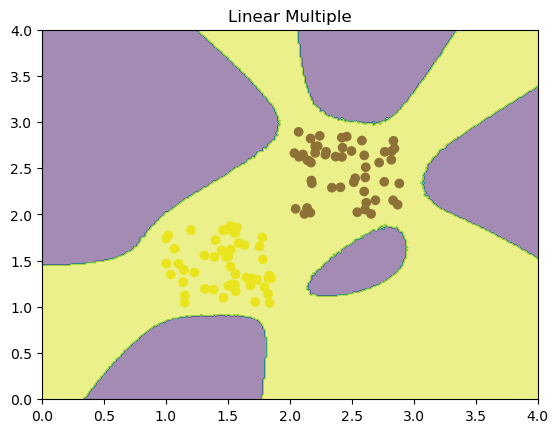

<Figure size 640x480 with 0 Axes>

In [114]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(0, 4, 300)
y = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Linear Multiple')
plt.show()
plt.clf()

### XOR

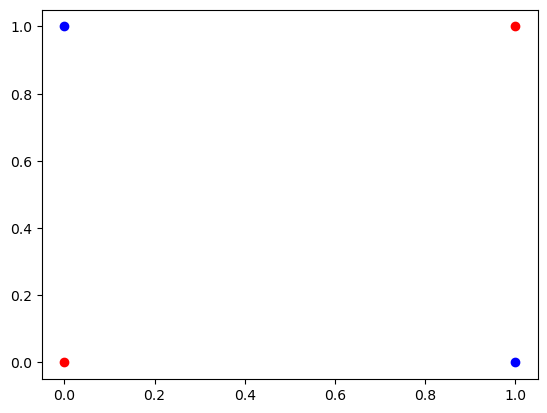

<Figure size 640x480 with 0 Axes>

In [115]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [0.0, 0.0], [1.0, 1.0]])
labels = np.array([[1.0], [1.0], [-1.0], [-1.0]])

plt.scatter(training_dataset[0:2, 0], training_dataset[0:2, 1], color='blue')
plt.scatter(training_dataset[2:4, 0], training_dataset[2:4, 1], color='red')
plt.show()
plt.clf()

In [116]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [117]:
gamma: float = 0.1
model.fit(gamma)

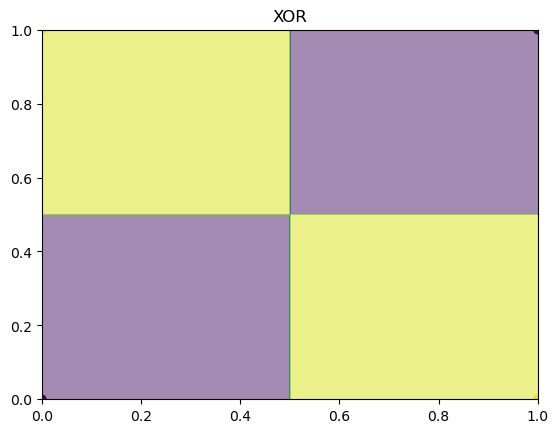

<Figure size 640x480 with 0 Axes>

In [118]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('XOR')
plt.show()
plt.clf()

### Cross

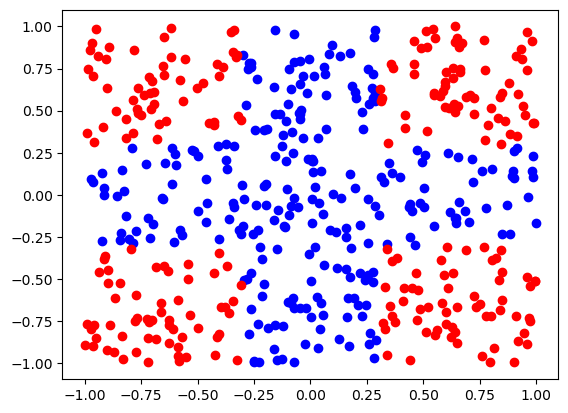

<Figure size 640x480 with 0 Axes>

In [119]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 0], 
    np.array(list(map(
        lambda elt: elt[1], 
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.show()
plt.clf()

In [120]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [121]:
gamma: float = 0.1
model.fit(gamma)

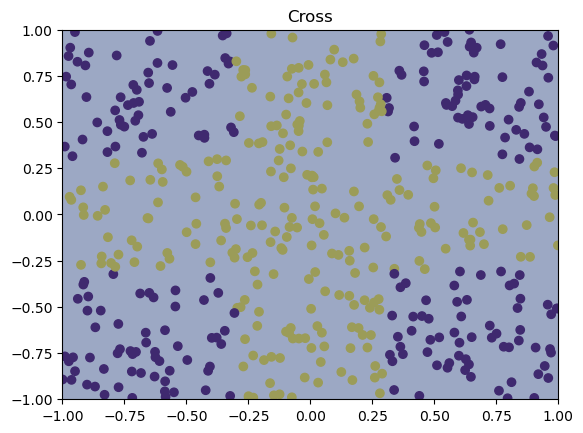

<Figure size 640x480 with 0 Axes>

In [122]:
plt.scatter([p[0] for p in training_dataset], [p[1] for p in training_dataset], c=[l[0] for l in labels])
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[1 if model.predict([x, y])[0]>0 else -1 for x in x] for y in y])
plt.contourf(X, Y, Z, alpha=0.5)
plt.title('Cross')
plt.show()
plt.clf()

### Multi Linear 3 Classes

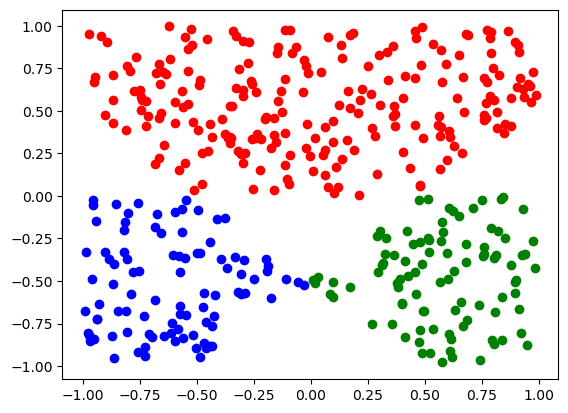

<Figure size 640x480 with 0 Axes>

In [123]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if -p[0] - p[1] - 0.5 > 0 > p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 1.0, 0.0] if -p[0] - p[1] - 0.5 < 0 < p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 0.0, 1.0] if -p[0] - p[1] - 0.5 < 0 < p[0] - p[1] - 0.5 and p[1] < 0
    else [0.0, 0.0, 0.0] for p in training_dataset
])
training_dataset = training_dataset[[not np.all(arr == [0, 0, 0]) for arr in labels]]
labels = labels[[not np.all(arr == [0, 0, 0]) for arr in labels]]

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1], 
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [124]:
input_neurons_count: int = 2
output_neurons_count: int = 3
activation: str = "logistic"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [125]:
gamma: float = 0.1
model.fit(gamma)

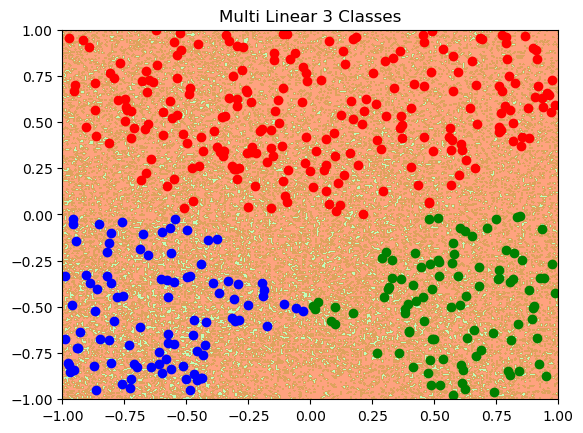

<Figure size 640x480 with 0 Axes>

In [126]:
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[np.argmax(model.predict([xx, yy])) for xx in x] for yy in y])
plt.contourf(X, Y, Z, alpha=0.5, levels=np.arange(4) - 0.5, cmap='jet')
plt.scatter(training_dataset[labels[:, 0] == 1][:, 0], training_dataset[labels[:, 0] == 1][:, 1], color='blue')
plt.scatter(training_dataset[labels[:, 1] == 1][:, 0], training_dataset[labels[:, 1] == 1][:, 1], color='red')
plt.scatter(training_dataset[labels[:, 2] == 1][:, 0], training_dataset[labels[:, 2] == 1][:, 1], color='green')
plt.title('Multi Linear 3 Classes')
plt.show()
plt.clf()

### Multi Cross

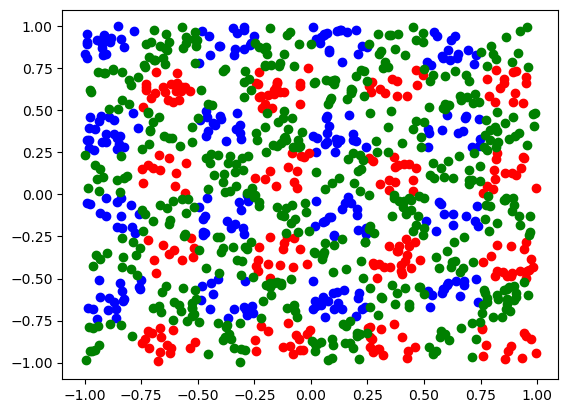

<Figure size 640x480 with 0 Axes>

In [127]:
training_dataset = np.random.random((1000, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if abs(p[0] % 0.5) <= 0.25 < abs(p[1] % 0.5)
    else [0.0, 1.0, 0.0] if abs(p[0] % 0.5) > 0.25 >= abs(p[1] % 0.5)
    else [0.0, 0.0, 1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [128]:
input_neurons_count: int = 2
output_neurons_count: int = 3
activation: str = "logistic"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [129]:
gamma: float = 0.1
model.fit(gamma)

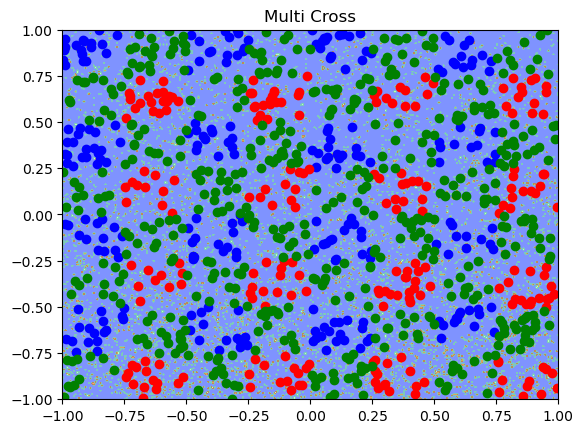

<Figure size 640x480 with 0 Axes>

In [130]:
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[np.argmax(model.predict([xx, yy])) for xx in x] for yy in y])
plt.contourf(X, Y, Z, alpha=0.5, levels=np.arange(4) - 0.5, cmap='jet')
plt.scatter(training_dataset[labels[:, 0] == 1][:, 0], training_dataset[labels[:, 0] == 1][:, 1], color='blue')
plt.scatter(training_dataset[labels[:, 1] == 1][:, 0], training_dataset[labels[:, 1] == 1][:, 1], color='red')
plt.scatter(training_dataset[labels[:, 2] == 1][:, 0], training_dataset[labels[:, 2] == 1][:, 1], color='green')
plt.title('Multi Cross')
plt.show()
plt.clf()

## Regression

### Linear Simple 2D

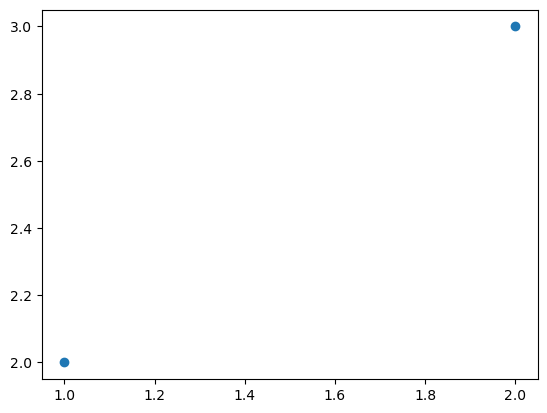

<Figure size 640x480 with 0 Axes>

In [131]:
training_dataset = np.array([[1.0], [2.0]])
labels = np.array([[2.0], [3.0]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [132]:
input_neurons_count: int = 1
output_neurons_count: int = 1
activation: str = "identity" 
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [133]:
gamma: float = 0.1
model.fit(gamma)

In [134]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [1.9999999999999991]
Expected: [3.], Predicted: [2.999999999999999]


### Non Linear Simple 2

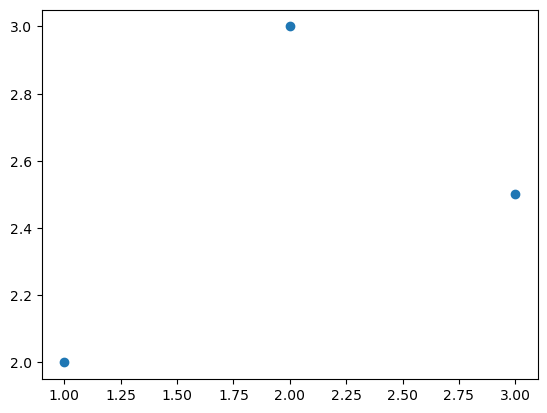

<Figure size 640x480 with 0 Axes>

In [135]:
training_dataset = np.array([[1.0], [2.0], [3.0]])
labels = np.array([[2.0], [3.0], [2.5]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [136]:
input_neurons_count: int = 1
output_neurons_count: int = 1
activation: str = "identity"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [137]:
gamma: float = 0.1
model.fit(gamma)

In [138]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000533]
Expected: [3.], Predicted: [3.0000000000000604]
Expected: [2.5], Predicted: [2.500000000000057]


### Linear Simple 3D

In [139]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 1.0]])
labels = np.array([[2.0], [3.0], [2.5]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [140]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "identity"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [141]:
gamma: float = 0.1
model.fit(gamma)

In [142]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000027]
Expected: [3.], Predicted: [3.0000000000000036]
Expected: [2.5], Predicted: [2.500000000000003]


### Linear Tricky 3D

In [143]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]])
Y = np.array([[1.0], [2.0], [3.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [144]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "identity"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [145]:
gamma: float = 0.1
model.fit(gamma)

In [146]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000013]
Expected: [3.], Predicted: [3.0000000000000018]
Expected: [2.5], Predicted: [2.500000000000001]


### Non Linear Simple 3D

In [147]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [0.0, 0.0]])
labels = np.array([[2.0], [1.0], [-2.0], [-1.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [148]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "identity"
model: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [149]:
gamma: float = 0.1
model.fit(gamma)

In [150]:
for i, input in enumerate(training_dataset):
    output: list[float] = model.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000284]
Expected: [1.], Predicted: [1.0000000000000284]
Expected: [-2.], Predicted: [-2.0000000000000853]
Expected: [-1.], Predicted: [-1.0000000000000284]
